In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_acc_time = [4.95, 0.79003]
ds_acc_time = [8.45, 0.79003]

In [13]:
income_acc_df = pd.read_csv("income_flower_acc.txt").iloc[:, 1]

income_acc_arr = []
for i in range(len(income_acc_df)):
    cur_val = float(income_acc_df[i][10:])
    income_acc_arr.append(cur_val)

In [14]:
income_time_df = pd.read_csv("income_flower_time.txt").iloc[:, 0]

income_time_arr = []
for i in range(len(income_time_df)):
    cur_val = float(income_time_df[i][5:])
    income_time_arr.append(cur_val)

for i in range(1, len(income_time_arr)):
    income_time_arr[i] = income_time_arr[i] - income_time_arr[0]

In [17]:
openfl_df = pd.read_csv("income_openfl.txt", header=None, sep="\t")
openfl_time_arr = np.array(openfl_df.iloc[:,0])
openfl_acc_arr = np.array(openfl_df.iloc[:,1])

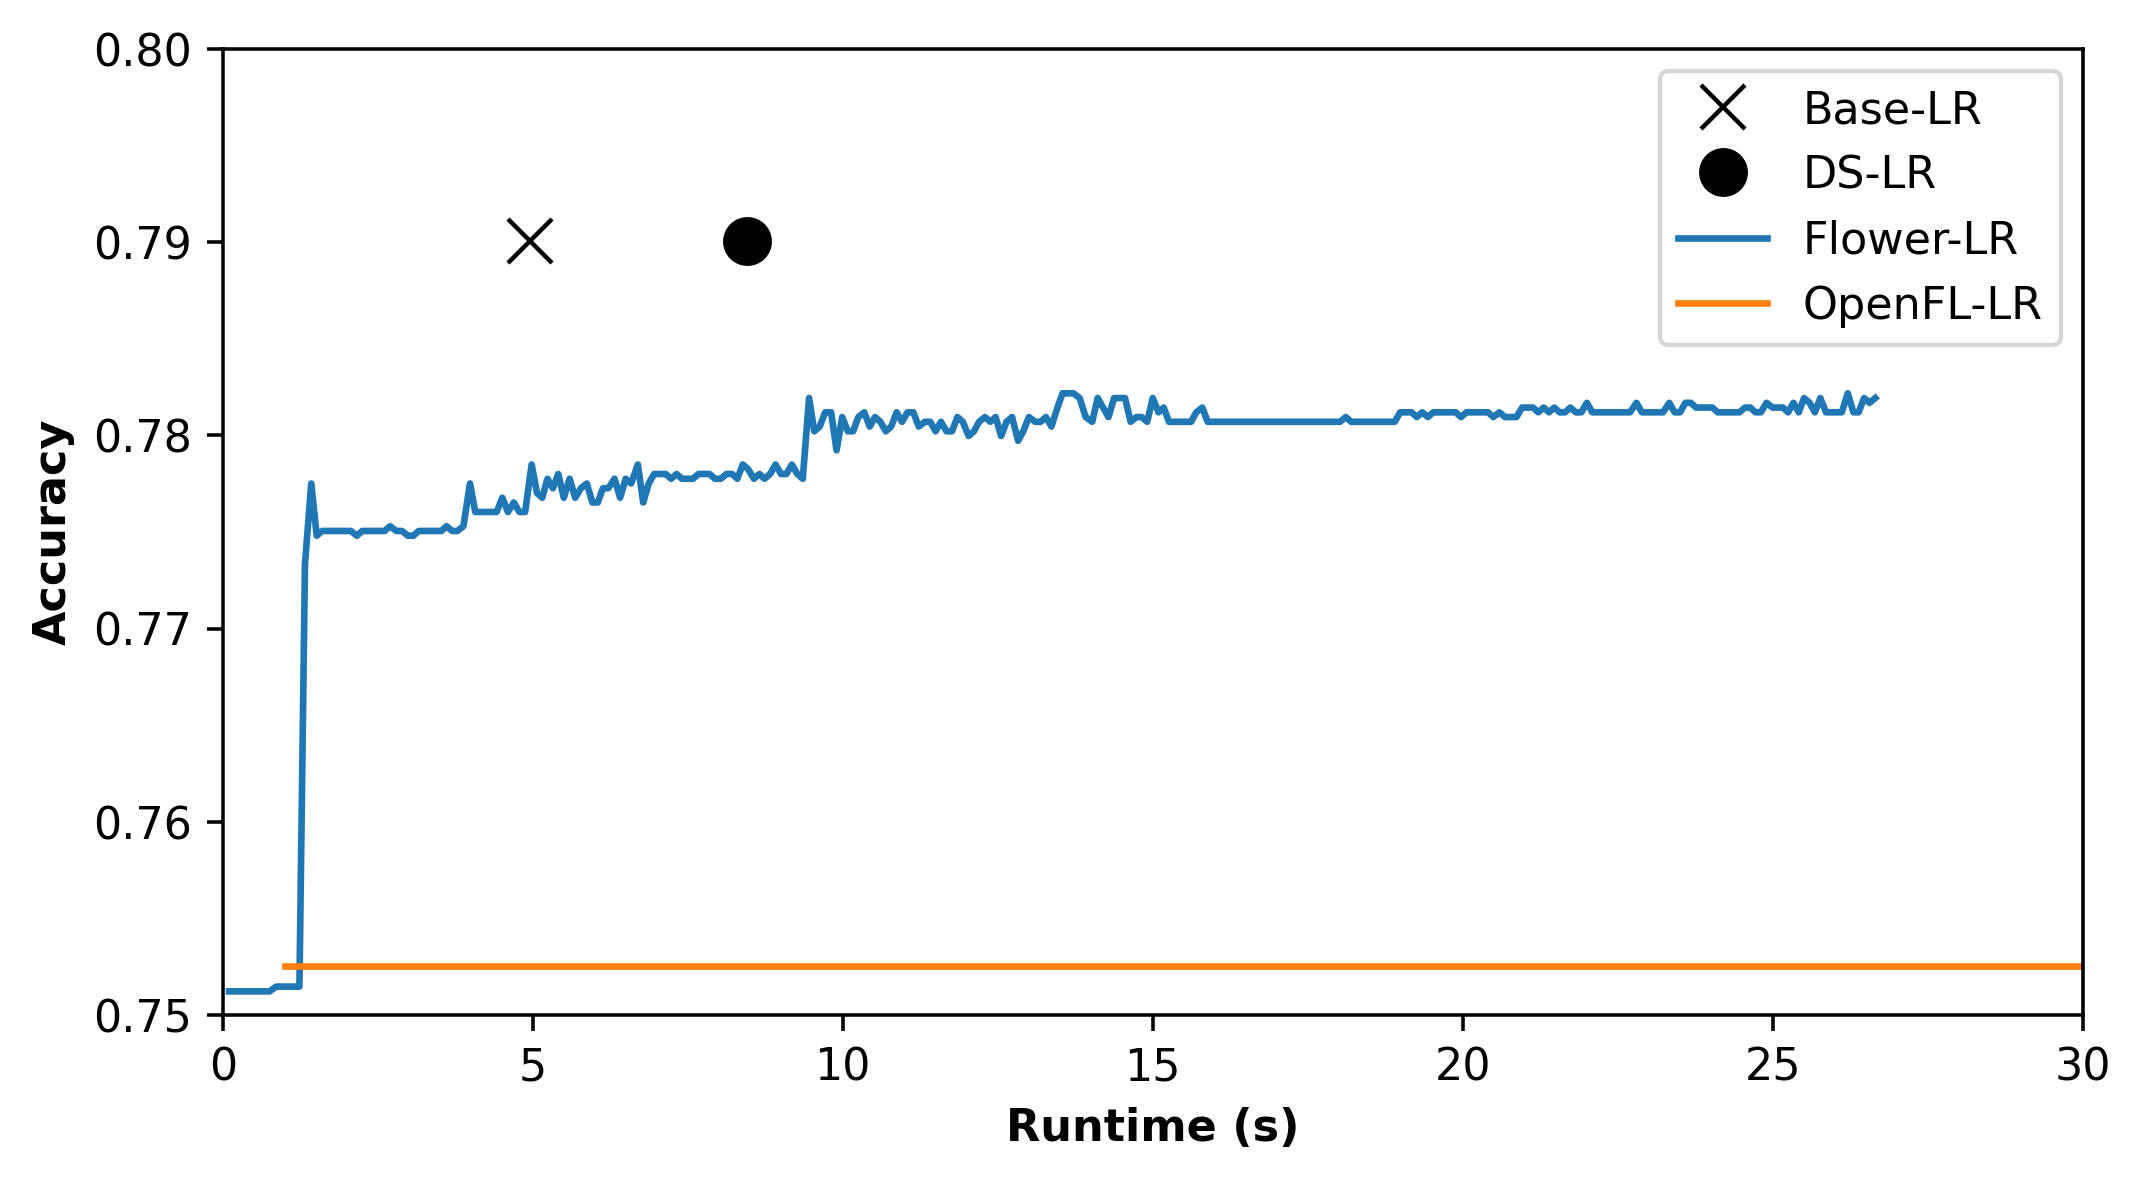

In [20]:
plt.figure(figsize=(7.5, 4), dpi=320)

plt.plot(base_acc_time[0],
         base_acc_time[1],
         marker='x',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-LR")
plt.plot(ds_acc_time[0],
         ds_acc_time[1],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-LR")
plt.plot(income_time_arr[1:], income_acc_arr[1:], label="Flower-LR")
plt.plot(openfl_time_arr, openfl_acc_arr, label="OpenFL-LR")
plt.xlabel("Runtime (s)", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend()
plt.xlim([0, 30])
plt.ylim([0.750, 0.800])
plt.savefig("income_8.pdf",
            facecolor="w",
            bbox_inches='tight',)